In [2]:
import pandas as pd
import numpy as np

temp = pd.read_csv('temp_seoul_no.csv', encoding='cp949')
temp.head()

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,\t1907-10-01,108,13.5,7.9,20.7
1,\t1907-10-02,108,16.2,7.9,22.0
2,\t1907-10-03,108,16.2,13.1,21.3
3,\t1907-10-04,108,16.5,11.2,22.0
4,\t1907-10-05,108,17.6,10.9,25.4


In [3]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41766 entries, 0 to 41765
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   날짜       41766 non-null  object 
 1   지점       41766 non-null  int64  
 2   평균기온(℃)  41009 non-null  float64
 3   최저기온(℃)  41006 non-null  float64
 4   최고기온(℃)  41006 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 1.6+ MB


In [4]:
temp.columns

Index(['날짜', '지점', '평균기온(℃)', '최저기온(℃)', '최고기온(℃)'], dtype='object')

In [5]:
temp.columns[2]

'평균기온(℃)'

In [7]:
temp[temp.columns[2]].isna().sum()

757

In [8]:
temp_new = temp.copy()
temp_new.head(3)

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,\t1907-10-01,108,13.5,7.9,20.7
1,\t1907-10-02,108,16.2,7.9,22.0
2,\t1907-10-03,108,16.2,13.1,21.3


In [9]:
temp_new = temp_new.rename(columns= {temp_new.columns[2]: 'temp_mean'})
temp_new.head()

,날짜,지점,temp_mean,최저기온(℃),최고기온(℃)
0,\t1907-10-01,108,13.5,7.9,20.7
1,\t1907-10-02,108,16.2,7.9,22.0
2,\t1907-10-03,108,16.2,13.1,21.3
3,\t1907-10-04,108,16.5,11.2,22.0
4,\t1907-10-05,108,17.6,10.9,25.4


In [10]:
temp_new = temp_new.rename(columns= {temp_new.columns[3]: 'temp_min'})

In [11]:
temp_new = temp_new.rename(columns= {temp_new.columns[4]: 'temp_max'})

In [12]:
temp_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41766 entries, 0 to 41765
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   날짜         41766 non-null  object 
 1   지점         41766 non-null  int64  
 2   temp_mean  41009 non-null  float64
 3   temp_min   41006 non-null  float64
 4   temp_max   41006 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 1.6+ MB


In [14]:
temp_new[['temp_max']].max()

temp_max    39.6
dtype: float64

In [15]:
temp_new.query('temp_max == 39.6')

,날짜,지점,temp_mean,temp_min,temp_max
40051,\t2018-08-01,108,33.6,27.8,39.6


In [16]:
temp_new['날짜'] = temp_new['날짜'].str.replace('\t', '')
temp_new.head()

,날짜,지점,temp_mean,temp_min,temp_max
0,1907-10-01,108,13.5,7.9,20.7
1,1907-10-02,108,16.2,7.9,22.0
2,1907-10-03,108,16.2,13.1,21.3
3,1907-10-04,108,16.5,11.2,22.0
4,1907-10-05,108,17.6,10.9,25.4


In [17]:
temp_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41766 entries, 0 to 41765
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   날짜         41766 non-null  object 
 1   지점         41766 non-null  int64  
 2   temp_mean  41009 non-null  float64
 3   temp_min   41006 non-null  float64
 4   temp_max   41006 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 1.6+ MB


In [19]:
temp_new['날짜'] = temp_new['날짜'].apply(lambda x: pd.to_datetime(str(x), format='%Y-%m-%d'))

In [20]:
temp_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41766 entries, 0 to 41765
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   날짜         41766 non-null  datetime64[ns]
 1   지점         41766 non-null  int64         
 2   temp_mean  41009 non-null  float64       
 3   temp_min   41006 non-null  float64       
 4   temp_max   41006 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 1.6 MB


In [21]:
temp_new.head()

,날짜,지점,temp_mean,temp_min,temp_max
0,1907-10-01,108,13.5,7.9,20.7
1,1907-10-02,108,16.2,7.9,22.0
2,1907-10-03,108,16.2,13.1,21.3
3,1907-10-04,108,16.5,11.2,22.0
4,1907-10-05,108,17.6,10.9,25.4


In [22]:
temp_new['diff'] = temp_new['temp_max'] - temp_new['temp_min']
temp_new.head()

,날짜,지점,temp_mean,temp_min,temp_max,diff
0,1907-10-01,108,13.5,7.9,20.7,12.8
1,1907-10-02,108,16.2,7.9,22.0,14.1
2,1907-10-03,108,16.2,13.1,21.3,8.2
3,1907-10-04,108,16.5,11.2,22.0,10.8
4,1907-10-05,108,17.6,10.9,25.4,14.5


In [23]:
temp_new.sort_values('diff', ascending=False).head(10)

,날짜,지점,temp_mean,temp_min,temp_max,diff
12619,1942-04-19,108,12.7,2.5,24.3,21.8
3863,1918-04-29,108,16.7,4.6,26.3,21.7
3147,1916-05-13,108,18.1,8.3,29.7,21.4
13980,1946-01-09,108,-8.1,-13.6,7.7,21.3
6026,1924-03-31,108,9.0,-1.0,20.2,21.2
7696,1928-10-26,108,14.3,4.5,25.7,21.2
559,1909-04-12,108,11.1,-0.9,20.2,21.1
3545,1917-06-15,108,23.8,13.5,34.5,21.0
2062,1913-05-24,108,19.7,9.2,30.0,20.8
11513,1939-04-09,108,10.6,0.6,21.4,20.8


In [24]:
temp_new['year'] = temp_new['날짜'].dt.year
temp_new.head()

,날짜,지점,temp_mean,temp_min,temp_max,diff,year
0,1907-10-01,108,13.5,7.9,20.7,12.8,1907
1,1907-10-02,108,16.2,7.9,22.0,14.1,1907
2,1907-10-03,108,16.2,13.1,21.3,8.2,1907
3,1907-10-04,108,16.5,11.2,22.0,10.8,1907
4,1907-10-05,108,17.6,10.9,25.4,14.5,1907


In [25]:
temp_new['month'] = temp_new['날짜'].dt.month

In [26]:
temp_new['day'] = temp_new['날짜'].dt.day

In [27]:
temp_new.head()

,날짜,지점,temp_mean,temp_min,temp_max,diff,year,month,day
0,1907-10-01,108,13.5,7.9,20.7,12.8,1907,10,1
1,1907-10-02,108,16.2,7.9,22.0,14.1,1907,10,2
2,1907-10-03,108,16.2,13.1,21.3,8.2,1907,10,3
3,1907-10-04,108,16.5,11.2,22.0,10.8,1907,10,4
4,1907-10-05,108,17.6,10.9,25.4,14.5,1907,10,5


In [28]:
pd.isna(temp_new).sum()

날짜             0
지점             0
temp_mean    757
temp_min     760
temp_max     760
diff         761
year           0
month          0
day            0
dtype: int64

In [29]:
temp_new.groupby('month')\
        .agg(diff_mean = ('diff', 'mean'))\
        .sort_values('diff_mean', ascending=False)

,diff_mean
month,
10,10.866916
5,10.844700
4,10.817507
6,9.722262
3,9.609164
9,9.464925
11,9.405089
2,8.874397
1,8.436826


In [30]:
temp_new.groupby('month')\
        .agg(mean_temp = ('temp_mean', 'mean'))

,mean_temp
month,
1,-3.534057
2,-0.903133
3,4.559349
4,11.473175
5,17.012298
6,21.538988
7,24.809706
8,25.554608
9,20.641441


In [31]:
temp_jan = temp_new.query('month == 1.0')
temp_jan.head()

,날짜,지점,temp_mean,temp_min,temp_max,diff,year,month,day
92,1908-01-01,108,-5.9,-9.1,-1.3,7.8,1908,1,1
93,1908-01-02,108,-7.7,-13.9,-3.0,10.9,1908,1,2
94,1908-01-03,108,-6.2,-10.8,-2.9,7.9,1908,1,3
95,1908-01-04,108,-7.5,-12.8,-1.7,11.1,1908,1,4
96,1908-01-05,108,-4.8,-11.3,-0.1,11.2,1908,1,5


In [32]:
mean_temp_jan = temp_jan.groupby('year')\
                        .agg(mean_temp_jan =('temp_mean', 'mean'))
mean_temp_jan.head()

,mean_temp_jan
year,
1908,-3.464516
1909,-2.509677
1910,-2.258065
1911,-4.961290
1912,-4.687097


<AxesSubplot:xlabel='year'>

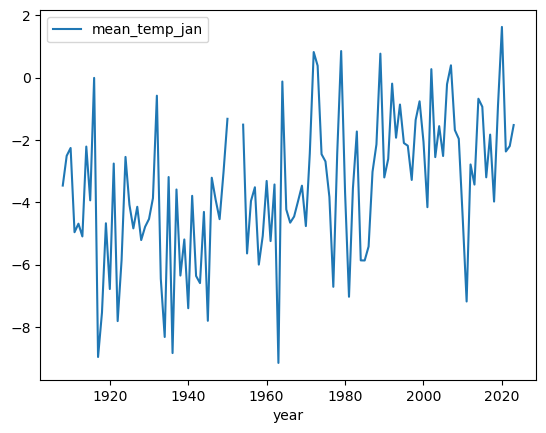

In [33]:
mean_temp_jan.plot.line()

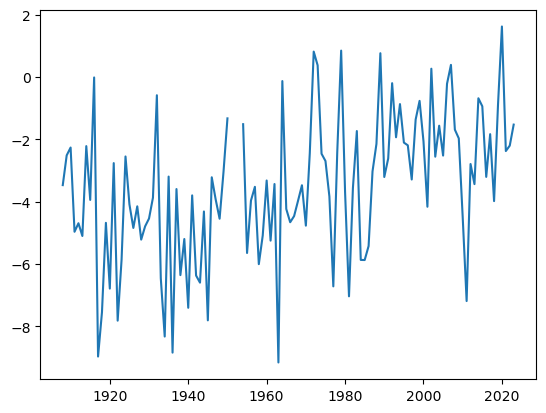

In [55]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(mean_temp_jan)
plt.show()